In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns


# Selecting the predictors and the target variable

In [47]:
houses_df = pd.read_csv('/workspaces/House_Sale/Houses_Cleaned_data.csv')

In [48]:
houses_df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [49]:
y = houses_df[['SalePrice']]
y.columns

Index(['SalePrice'], dtype='object')

In [50]:
x = houses_df.iloc[:, :-1]
x.columns


Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

# Testing Assumptions
**Linearity: The relationship between the predictors and the target should be linear.**

**Independence: Observations should be independent of each other.**

**Homoscedasticity: The variance of errors should be constant across all levels of the independent variables.**

**Normality of residuals: Residuals (the difference between predicted and actual values) should be normally distributed.**

In [51]:
# Creating Dummy variables
categorical_columns = x.select_dtypes(include=['object', 'category', 'bool']).columns

print("Categorical Features:", categorical_columns)

Categorical Features: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [52]:

categorical_columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                       'SaleType', 'SaleCondition']


df_encoded = pd.get_dummies(houses_df, columns=categorical_columns, drop_first=True)


In [53]:
correlation_with_target = df_encoded.corr()['SalePrice']
correlation_with_target


Unnamed: 0              -0.021917
Id                      -0.021917
MSSubClass              -0.084284
LotFrontage              0.320006
LotArea                  0.263843
                           ...   
SaleCondition_AdjLand   -0.050686
SaleCondition_Alloca    -0.015525
SaleCondition_Family    -0.046480
SaleCondition_Normal    -0.153990
SaleCondition_Partial    0.352060
Name: SalePrice, Length: 232, dtype: float64

In [54]:
filtered_correlation = correlation_with_target[(correlation_with_target > 0.4) | (correlation_with_target < -0.4)]
filtered_correlation

OverallQual             0.790982
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.475890
TotalBsmtSF             0.613581
1stFlrSF                0.605852
GrLivArea               0.708624
FullBath                0.560664
TotRmsAbvGrd            0.533723
Fireplaces              0.466929
GarageCars              0.640409
GarageArea              0.623431
SalePrice               1.000000
Neighborhood_NridgHt    0.402149
ExterQual_Gd            0.452466
ExterQual_TA           -0.589044
Foundation_PConc        0.497734
BsmtQual_TA            -0.494737
BsmtFinType1_GLQ        0.434622
KitchenQual_TA         -0.519298
GarageType_Detchd      -0.404563
GarageFinish_Unf       -0.506542
Name: SalePrice, dtype: float64

In [55]:
x_features = [
    'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 
    '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd', 
    'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 
    'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_Unf'
]

x_features_df = df_encoded[x_features]

x_features_df


,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageArea,Neighborhood_NridgHt,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtFinType1_GLQ,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,548,False,True,False,True,False,True,False,False,False
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,460,False,False,True,False,False,False,True,False,False
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,608,False,True,False,True,False,True,False,False,False
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,642,False,False,True,False,True,False,False,True,True
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,836,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,...,460,False,False,True,True,False,False,True,False,False
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,...,500,False,False,True,False,False,False,True,False,True
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,252,False,False,False,False,True,True,False,False,False
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,240,False,False,True,False,True,True,False,False,True


In [56]:
y_target = df_encoded['SalePrice']

**Independence**

In [57]:
highly_correlated_variables = df_encoded[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 
    '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 
    'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd', 
    'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ', 
    'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_Unf']]
correlation_matrix = highly_correlated_variables.corr()


correlation_matrix

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageArea,Neighborhood_NridgHt,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtFinType1_GLQ,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf
OverallQual,1.000000,0.572323,0.550684,0.411074,0.537808,0.476224,0.593007,0.550600,0.427452,0.396765,...,0.562022,0.368724,0.547731,-0.646247,0.568211,-0.556755,0.434125,-0.553891,-0.399385,-0.527719
YearBuilt,0.572323,1.000000,0.592855,0.315726,0.391452,0.281986,0.199010,0.468271,0.095589,0.147716,...,0.478954,0.268898,0.557910,-0.589126,0.651199,-0.649605,0.480674,-0.459792,-0.543072,-0.616193
YearRemodAdd,0.550684,0.592855,1.000000,0.180060,0.291066,0.240379,0.287389,0.439046,0.191740,0.112581,...,0.371600,0.243558,0.531482,-0.565424,0.569728,-0.533899,0.402723,-0.576964,-0.331601,-0.462122
MasVnrArea,0.411074,0.315726,0.180060,1.000000,0.362811,0.342337,0.390104,0.276193,0.279875,0.247818,...,0.372971,0.297337,0.145728,-0.261284,0.193938,-0.206403,0.227309,-0.196706,-0.209341,-0.271764
TotalBsmtSF,0.537808,0.391452,0.291066,0.362811,1.000000,0.819530,0.454868,0.323722,0.285573,0.339519,...,0.486665,0.293445,0.283254,-0.390398,0.307701,-0.313182,0.313518,-0.311190,-0.344318,-0.368231
1stFlrSF,0.476224,0.281986,0.240379,0.342337,0.819530,1.000000,0.566024,0.380637,0.409516,0.410531,...,0.489782,0.254693,0.208732,-0.312844,0.197188,-0.223524,0.243613,-0.273566,-0.344948,-0.316488
GrLivArea,0.593007,0.199010,0.287389,0.390104,0.454868,0.566024,1.000000,0.630012,0.825489,0.461679,...,0.468997,0.179892,0.302516,-0.386146,0.292764,-0.302291,0.194555,-0.350179,-0.261229,-0.319531
FullBath,0.550600,0.468271,0.439046,0.276193,0.323722,0.380637,0.630012,1.000000,0.554784,0.243671,...,0.405656,0.203038,0.425119,-0.466339,0.461667,-0.495636,0.259089,-0.418698,-0.334431,-0.438946
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.279875,0.285573,0.409516,0.825489,0.554784,1.000000,0.326114,...,0.337822,0.168094,0.166488,-0.242485,0.192609,-0.162767,0.064335,-0.210428,-0.175447,-0.208845
Fireplaces,0.396765,0.147716,0.112581,0.247818,0.339519,0.410531,0.461679,0.243671,0.326114,1.000000,...,0.269141,0.151202,0.152868,-0.200168,0.103510,-0.167160,0.115473,-0.186137,-0.284338,-0.267282


In [58]:
dependent_variables = correlation_matrix[(correlation_matrix < 0.4) | (correlation_matrix > -0.4)]
dependent_variables

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageArea,Neighborhood_NridgHt,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtFinType1_GLQ,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf
OverallQual,1.000000,0.572323,0.550684,0.411074,0.537808,0.476224,0.593007,0.550600,0.427452,0.396765,...,0.562022,0.368724,0.547731,-0.646247,0.568211,-0.556755,0.434125,-0.553891,-0.399385,-0.527719
YearBuilt,0.572323,1.000000,0.592855,0.315726,0.391452,0.281986,0.199010,0.468271,0.095589,0.147716,...,0.478954,0.268898,0.557910,-0.589126,0.651199,-0.649605,0.480674,-0.459792,-0.543072,-0.616193
YearRemodAdd,0.550684,0.592855,1.000000,0.180060,0.291066,0.240379,0.287389,0.439046,0.191740,0.112581,...,0.371600,0.243558,0.531482,-0.565424,0.569728,-0.533899,0.402723,-0.576964,-0.331601,-0.462122
MasVnrArea,0.411074,0.315726,0.180060,1.000000,0.362811,0.342337,0.390104,0.276193,0.279875,0.247818,...,0.372971,0.297337,0.145728,-0.261284,0.193938,-0.206403,0.227309,-0.196706,-0.209341,-0.271764
TotalBsmtSF,0.537808,0.391452,0.291066,0.362811,1.000000,0.819530,0.454868,0.323722,0.285573,0.339519,...,0.486665,0.293445,0.283254,-0.390398,0.307701,-0.313182,0.313518,-0.311190,-0.344318,-0.368231
1stFlrSF,0.476224,0.281986,0.240379,0.342337,0.819530,1.000000,0.566024,0.380637,0.409516,0.410531,...,0.489782,0.254693,0.208732,-0.312844,0.197188,-0.223524,0.243613,-0.273566,-0.344948,-0.316488
GrLivArea,0.593007,0.199010,0.287389,0.390104,0.454868,0.566024,1.000000,0.630012,0.825489,0.461679,...,0.468997,0.179892,0.302516,-0.386146,0.292764,-0.302291,0.194555,-0.350179,-0.261229,-0.319531
FullBath,0.550600,0.468271,0.439046,0.276193,0.323722,0.380637,0.630012,1.000000,0.554784,0.243671,...,0.405656,0.203038,0.425119,-0.466339,0.461667,-0.495636,0.259089,-0.418698,-0.334431,-0.438946
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.279875,0.285573,0.409516,0.825489,0.554784,1.000000,0.326114,...,0.337822,0.168094,0.166488,-0.242485,0.192609,-0.162767,0.064335,-0.210428,-0.175447,-0.208845
Fireplaces,0.396765,0.147716,0.112581,0.247818,0.339519,0.410531,0.461679,0.243671,0.326114,1.000000,...,0.269141,0.151202,0.152868,-0.200168,0.103510,-0.167160,0.115473,-0.186137,-0.284338,-0.267282


In [59]:
dependent_variables.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_Unf'],
      dtype='object')

In [60]:
final_x_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_Unf']

predictor_variables = df_encoded[final_x_features]
predictor_variables

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageArea,Neighborhood_NridgHt,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtFinType1_GLQ,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,548,False,True,False,True,False,True,False,False,False
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,460,False,False,True,False,False,False,True,False,False
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,608,False,True,False,True,False,True,False,False,False
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,642,False,False,True,False,True,False,False,True,True
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,836,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,...,460,False,False,True,True,False,False,True,False,False
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,...,500,False,False,True,False,False,False,True,False,True
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,252,False,False,False,False,True,True,False,False,False
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,240,False,False,True,False,True,True,False,False,True


In [61]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variables, y_target, test_size=0.2, random_state=42)


In [62]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)
y_pred

array([150257.65127594, 304318.51634342, 118960.51547911, 169215.29341873,
       281780.34132415,  53046.67608718, 227876.69518909, 162229.85065257,
        55485.65408036, 120564.88426007, 144819.06237638, 102970.27305976,
       129698.24025186, 249151.26238927, 187211.64349475, 121638.14665174,
       210421.27462282, 125501.38482017, 119939.12597127, 218580.77909371,
       180584.54440431, 210790.6218439 , 188389.04970636, 112104.56041769,
       213064.98810487, 179858.61281489, 207103.0944254 ,  87703.66573761,
       182646.29431462, 204898.29450396, 126672.78755676, 288096.92199893,
       207196.26982268,  82041.43503154, 270588.08371896, 143886.63237428,
       151164.7189717 , 219957.62462546, 295870.8748346 ,  83195.88383179,
       140804.7563445 , 254078.27991918, 102296.15568277, 345913.12753596,
       116689.52533746, 157086.26083686, 100622.88617485, 106055.31449936,
       387590.85252315, 127378.50905613,  99570.67448875, 203606.83889745,
       127567.59071816, 2

In [64]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.823540979827996


In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
#rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 

print("MAE:",mae) 
print("MSE:",mse) 
#print("RMSE:",rmse)


MAE: 23658.92259690658
MSE: 1353498246.9198842


# Checking for outliers

In [66]:

Q1 = df_encoded['SalePrice'].quantile(0.25)
Q3 = df_encoded['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df_encoded[(df_encoded['SalePrice'] >= lower_bound) & (df_encoded['SalePrice'] <= upper_bound)]
df_no_outliers


,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,False,False,False,False,True,False,False,False,True,False
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,False,False,False,False,True,False,False,False,True,False
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,False,False,False,False,True,False,False,False,True,False
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,False,False,False,False,True,False,False,False,False,False
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,62.0,7917,6,5,1999,2000,0.0,...,False,False,False,False,True,False,False,False,True,False
1456,1456,1457,20,85.0,13175,6,6,1978,1988,119.0,...,False,False,False,False,True,False,False,False,True,False
1457,1457,1458,70,66.0,9042,7,9,1941,2006,0.0,...,False,False,False,False,True,False,False,False,True,False
1458,1458,1459,20,68.0,9717,5,6,1950,1996,0.0,...,False,False,False,False,True,False,False,False,True,False


In [67]:
final_x_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_PConc', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
       'KitchenQual_TA', 'GarageType_Detchd', 'GarageFinish_Unf']

predictor_variable = df_no_outliers[final_x_features]
predictor_variable

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,...,GarageArea,Neighborhood_NridgHt,ExterQual_Gd,ExterQual_TA,Foundation_PConc,BsmtQual_TA,BsmtFinType1_GLQ,KitchenQual_TA,GarageType_Detchd,GarageFinish_Unf
0,7,2003,2003,196.0,856,856,1710,2,8,0,...,548,False,True,False,True,False,True,False,False,False
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,...,460,False,False,True,False,False,False,True,False,False
2,7,2001,2002,162.0,920,920,1786,2,6,1,...,608,False,True,False,True,False,True,False,False,False
3,7,1915,1970,0.0,756,961,1717,1,7,1,...,642,False,False,True,False,True,False,False,True,True
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,...,836,False,True,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,0.0,953,953,1647,2,7,1,...,460,False,False,True,True,False,False,True,False,False
1456,6,1978,1988,119.0,1542,2073,2073,2,7,2,...,500,False,False,True,False,False,False,True,False,True
1457,7,1941,2006,0.0,1152,1188,2340,2,9,2,...,252,False,False,False,False,True,True,False,False,False
1458,5,1950,1996,0.0,1078,1078,1078,1,5,0,...,240,False,False,True,False,True,True,False,False,True


In [68]:
y_tar = df_no_outliers['SalePrice']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(predictor_variable, y_tar, test_size=0.2, random_state=42)


In [70]:
y_pred = model.predict(X_test)
y_pred

array([159150.09374346, 131269.78516995, 183820.74739305, 131160.271302  ,
       143194.13866147, 296142.58690788, 214244.35063932, 169901.81671881,
       107453.7792089 , 220542.10821265, 295870.8748346 , 135273.52827132,
       125884.06183985, 320910.89147614, 213372.8820899 , 226631.00321935,
       193866.75723411, 143947.6300831 , 105474.28986128, 183814.42162988,
        86260.20672854, 229587.44364618, 233696.19551486, 117662.5269561 ,
       175080.15019521, 139433.21947175, 331849.28349364,  67577.8832363 ,
       127132.72897622, 126591.03009814, 226121.64713094, 289583.32055257,
       240755.73852245, 215689.86970616, 190221.02470349, 152201.9294804 ,
       126571.45423916, 249382.1769754 , 185619.83843251, 353490.58525187,
       262046.5527301 ,  80148.19462828, 328072.43582068, 121485.62554335,
       126578.5846326 , 184545.7777576 , 188347.148311  , 116294.48852611,
       115021.59597508,  86491.60610178, 155557.25613802, 135095.60704047,
       164724.30263985, 1

In [71]:
regr = LinearRegression() 
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.8214828870142052


In [72]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred) 
#squared True returns MSE value, False returns RMSE value. 
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True 
#rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 

print("MAE:",mae) 
print("MSE:",mse) 
#print("RMSE:",rmse)


MAE: 18002.710442977037
MSE: 538489657.2230372


# Testing for Homoskedasticity

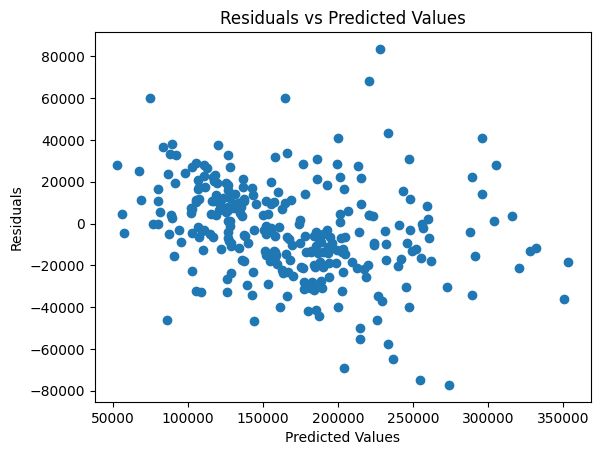

In [73]:
# Assuming that y_pred corresponds to predictions from X_test
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


# Checking MultiCollinearity Problem

In [78]:
predictor_variable = np.array(predictor_variable, dtype=float)

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd


predictor_variable = pd.DataFrame(predictor_variable, columns=final_x_features)

vif_data = pd.DataFrame()
vif_data["Feature"] = predictor_variable.columns
vif_data["VIF"] = [variance_inflation_factor(predictor_variable.values, i) for i in range(predictor_variable.shape[1])]

print(vif_data)
selected_features = vif_data[vif_data["VIF"] < 5]["Feature"]

# Create a new DataFrame with only the selected features
predictor_variable_filtered = predictor_variable[selected_features]

# Display the filtered DataFrame and VIF results
print("Selected Features with VIF < 5:")
print(selected_features)
print("\nFiltered Predictor Variables:")
print(predictor_variable_filtered.head())
print("\nVIF Results:")
print(vif_data)


                 Feature          VIF
0            OverallQual    63.855281
1              YearBuilt  9720.394741
2           YearRemodAdd  9771.000730
3             MasVnrArea     1.685915
4            TotalBsmtSF    23.066555
5               1stFlrSF    37.399292
6              GrLivArea    52.303489
7               FullBath    20.522057
8           TotRmsAbvGrd    61.768796
9             Fireplaces     2.608656
10            GarageCars    34.327471
11            GarageArea    29.807251
12  Neighborhood_NridgHt     1.225631
13          ExterQual_Gd    14.281514
14          ExterQual_TA    28.666583
15      Foundation_PConc     3.991079
16           BsmtQual_TA     4.162235
17      BsmtFinType1_GLQ     1.930872
18        KitchenQual_TA     4.255688
19     GarageType_Detchd     2.468114
20      GarageFinish_Unf     3.836880
Selected Features with VIF < 5:
3               MasVnrArea
9               Fireplaces
12    Neighborhood_NridgHt
15        Foundation_PConc
16             BsmtQual_

In [80]:
Selected_Features = ['MasVnrArea',
    'Fireplaces',
    'Neighborhood_NridgHt',
    'Foundation_PConc',
    'BsmtQual_TA',
    'BsmtFinType1_GLQ',
    'KitchenQual_TA',
    'GarageType_Detchd',
    'GarageFinish_Unf'
]


In [81]:
Selected_Features = df_no_outliers[Selected_Features]

In [90]:
X_trains, X_tests, y_trains, y_tests = train_test_split(Selected_Features, y_tar, test_size=0.2, random_state=42)


In [91]:
model = LinearRegression()

model.fit(X_trains, y_trains)

LinearRegression()

In [92]:
y_preds = model.predict(X_tests)
y_preds

array([174830.47415871, 157940.28995234, 214847.78826037, 101656.57803182,
       174676.70882265, 260527.59007903, 196706.35693727, 111647.62219678,
       101656.57803182, 184035.54943533, 228732.73560048, 162287.92755323,
       120092.5233031 , 238517.02422005, 205662.29659298, 229488.63110072,
       184991.21515821, 139442.40808074, 120092.5233031 , 194923.64140757,
       101656.57803182, 229488.63110072, 251713.57693513, 157878.35335203,
       173994.78474487, 130083.56746807, 276525.87009939, 101656.57803182,
       111647.62219678, 129451.36391578, 228732.73560048, 254987.48081942,
       216123.36191701, 207934.61557034, 198820.14552454, 142679.27838185,
       128445.97766741, 228732.73560048, 187904.62328872, 264337.05515813,
       255147.96237908, 147035.68827475, 256322.92135898, 130083.56746807,
       146249.7193864 , 157878.35335203, 173825.08791034, 101656.57803182,
       114884.49249789, 111647.62219678, 101656.57803182, 116560.9429483 ,
       152475.73450855, 1

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trains)
X_test_scaled = scaler.transform(X_tests)

model.fit(X_train_scaled, y_trains)


LinearRegression()

In [98]:
y_preds = model.predict(X_tests)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [99]:
regr = LinearRegression() 
regr.fit(X_trains, y_trains) 
print(regr.score(X_tests, y_tests))

0.5810124635609791


In [100]:
ma = mean_absolute_error(y_true=y_tests,y_pred=y_preds) 
#squared True returns MSE value, False returns RMSE value. 
ms = mean_squared_error(y_true=y_tests,y_pred=y_preds) #default=True 
#rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 

print("MAE:",ma) 
print("MSE:",ms) 

MAE: 722536.3116934227
MSE: 2102231297195.0786


In [96]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 173825.0879103429
Coefficients: [    47.24346876  27794.78588396  28328.82536791  13227.91446607
 -18435.94527128  13884.94734011 -26943.16497165  -9991.04416497
 -16798.35547062]


In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [102]:
import numpy as np

# Compute IQR
Q1 = X_trains.quantile(0.25)
Q3 = X_trains.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
X_trains_cleaned = X_trains[~((X_trains < lower_bound) | (X_trains > upper_bound)).any(axis=1)]
y_trains_cleaned = y_trains.loc[X_trains_cleaned.index]


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.